In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_excel(r'C:\Users\HP\Downloads\ML Project - KNN Loan Applicant Credit Risk Analysis U 16955473070.xlsx')

In [4]:
data

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1
...,...,...,...,...,...,...,...
8990,30.80,3,3,0.596748,763,0,0
8991,31.83,3,6,0.986793,532,0,0
8992,32.67,2,5,0.628330,590,0,0
8993,37.00,3,3,0.797193,812,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [7]:
data.isnull().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

In [8]:
data.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


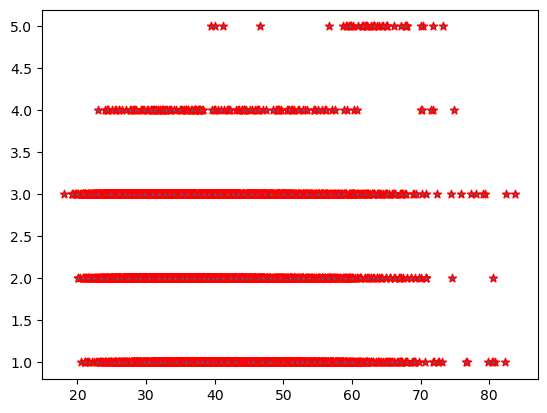

In [17]:
plt.scatter(data['Age'],data['Total Work Experience'],marker='*',edgecolors='red');

In [15]:
import warnings
warnings.filterwarnings('ignore')

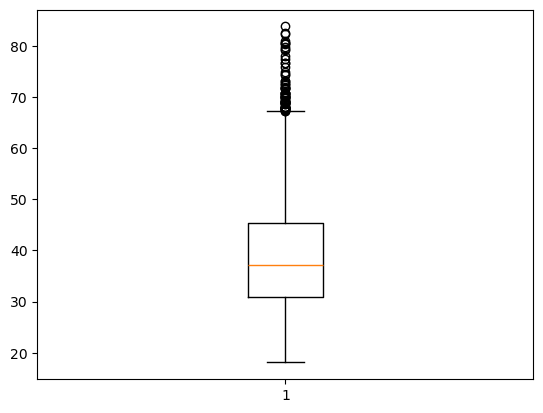

In [19]:
plt.boxplot(data['Age']);

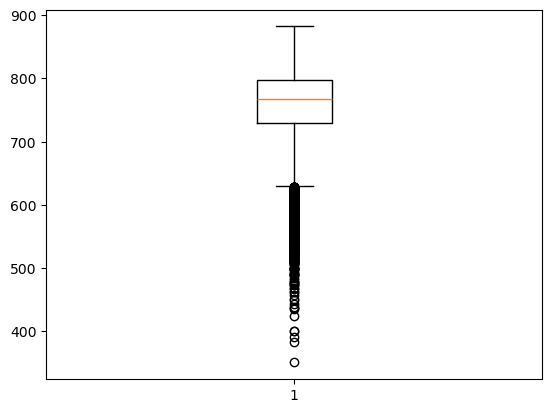

In [22]:
plt.boxplot(data['Cibil score']);

In [24]:
x=data.drop('Total bounces past12months',axis=1)
y=data['Total bounces past12months']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=45)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
model=KNeighborsClassifier()

In [61]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [62]:
model.score(x_train,y_train)

0.674680377987771

In [63]:
model.score(x_test,y_test)

0.6436909394107838

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test,model.predict(x_test))

0.6436909394107838

In [71]:
train=[]
test=[]
for i in range(1,14):
    model1=KNeighborsClassifier(i)
    model1.fit(x_train,y_train)
    train.append(model1.score(x_train,y_train))
    test.append(model1.score(x_test,y_test))

In [72]:
train

[1.0,
 0.7402723735408561,
 0.7058087826570317,
 0.6866314619232907,
 0.674680377987771,
 0.6687048360200111,
 0.6645358532518065,
 0.6625903279599777,
 0.6599499722067815,
 0.6596720400222346,
 0.6581434130072262,
 0.6577265147304058,
 0.6563368538076709]

In [73]:
test

[0.5403001667593107,
 0.6247915508615898,
 0.6197887715397443,
 0.6386881600889383,
 0.6436909394107838,
 0.6475819899944414,
 0.6470261256253474,
 0.650917176209005,
 0.6498054474708171,
 0.6525847693162868,
 0.6542523624235687,
 0.6564758198999444,
 0.6570316842690384]

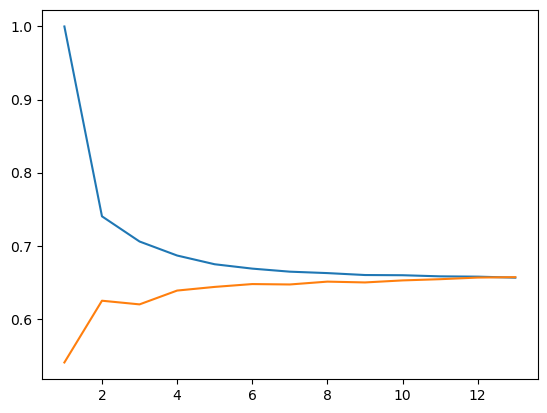

In [74]:
plt.plot(range(1,14),train)
plt.plot(range(1,14),test);